In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv 

In [5]:
df = pd.read_csv('50_Startups.csv')

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.shape

(50, 5)

In [10]:
df = df.drop('State',axis = True)

In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<AxesSubplot:>

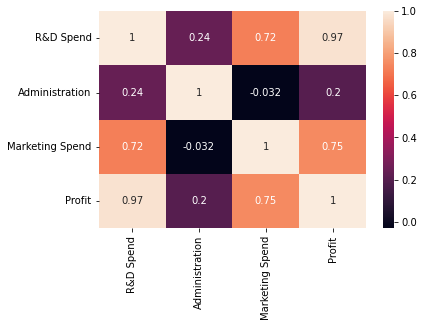

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [15]:
df = df.drop('Administration',axis = True)

In [16]:
df.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


<AxesSubplot:>

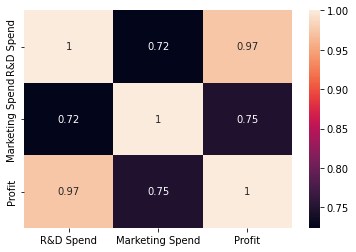

In [17]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [19]:
x = df.drop('Profit',axis = True)
y = df['Profit']

In [20]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
x.head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [24]:
x

array([[ 2.01641149e+00,  2.15394309e+00],
       [ 1.95586034e+00,  1.92360040e+00],
       [ 1.75436374e+00,  1.62652767e+00],
       [ 1.55478369e+00,  1.42221024e+00],
       [ 1.50493720e+00,  1.28152771e+00],
       [ 1.27980001e+00,  1.25421046e+00],
       [ 1.34006641e+00, -6.88149930e-01],
       [ 1.24505666e+00,  9.32185978e-01],
       [ 1.03036886e+00,  8.30886909e-01],
       [ 1.09181921e+00,  7.76107440e-01],
       [ 6.20398248e-01,  1.49807267e-01],
       [ 5.93085418e-01,  3.19833623e-01],
       [ 4.43259872e-01,  3.20617441e-01],
       [ 4.02077603e-01,  3.43956788e-01],
       [ 1.01718075e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.19218702e-01],
       [ 9.44411957e-02,  4.40446224e-01],
       [ 4.60720127e-01,  5.91016724e-01],
       [ 3.96724938e-01,  6.92992062e-01],
       [ 2.79441650e-01, -1.74312698e+00],
       [ 5.57260867e-02,  7.23925995e-01],
       [ 1.02723599e-01,  7.32787791e-01],
       [ 6.00657792e-03,  7.62375876e-01],
       [-1.

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40, 2), (10, 2), (40,), (10,))

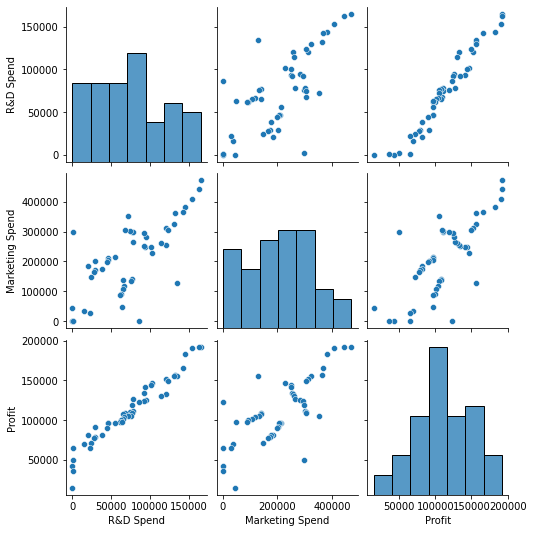

In [28]:
sns.pairplot(df)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = regressor.predict(x_test)

In [36]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns= ["Original Profit","Predict Profit"])

In [37]:
calculation

,Original Profit,Predict Profit
0,103282.38,102284.646052
1,144259.40,133873.923838
2,146121.95,134182.149517
3,77798.83,73701.106936
4,191050.39,180642.252997
5,105008.31,114717.249039
6,81229.06,68335.075753
7,97483.56,97433.459223
8,110352.25,114580.921365
9,166187.94,170343.319795


In [38]:
print("Training Accuracy :", regressor.score(x_train, y_train))
print("Testing Accuracy :", regressor.score(x_test, y_test))

Training Accuracy : 0.9496654854268441
Testing Accuracy : 0.9474386447268489


In [39]:
regressor.intercept_

111359.03989028865

In [41]:
feature = [165374.40,132538.20]
scale_feature = sc.transform([feature])
scale_feature

array([[ 2.01696606, -0.64832397]])

In [42]:
y_pred_test = regressor.predict(scale_feature)
y_pred_test

array([181081.26448991])